##### CSV 檔案操作
Python 的標準函式「csv」提供了操作 CSV 檔案的方法，可以針對 CSV 檔案進行讀取、寫入或修改，這篇教學將會介紹 csv 常用的方法。

* CSV 檔案操作時，需要使用 open() 開啟，詳細資訊可以參考：[內建函式 ( 檔案讀寫 open )](https://steam.oxxostudio.tw/category/python/basic/builtin-open.html)。
* 本篇教學可使用 CSV 範例檔：[CSV 檔案下載](https://steam.oxxostudio.tw/download/python/csv-demo.csv)

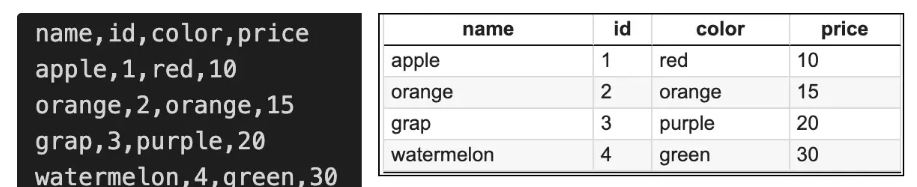

##### CSV 是什麼？ 
CSV 是一種以「逗號分隔值」的檔案格式，並以「純文字形式」儲存資料 ( 數字和文字 )，CSV 是一種通用並相對簡單的檔案格式，\
廣泛應用於使用者、商業和科學領域，因此幾乎所有的分析軟體和應用程式，都支援 CSV 格式。

下方所呈現的是一個簡單的 CSV 檔案內容，第一行可以作為普通的內容，也可以是表格的開頭：

In [ ]:
name,id,color,price
apple,1,red,10
orange,2,orange,15
grap,3,purple,20
watermelon,4,green,30

##### CSV 常用方法 
下方列出幾種 csv 模組常用的方法 ( 參考 Python 官方文件：[CSV 文件讀寫](https://docs.python.org/zh-tw/3/library/csv.html) )：

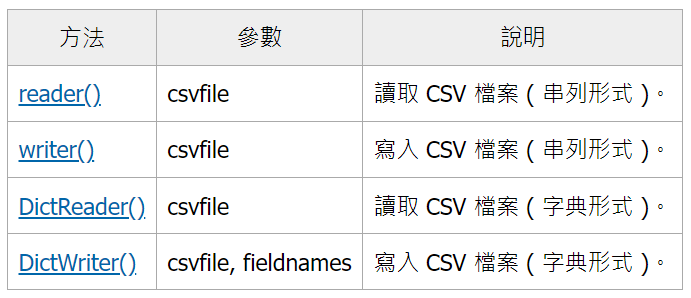

##### import csv 
要使用 csv 必須先 import csv 模組，或使用 from 的方式，單獨 import 特定的類型。

In [ ]:
import csv
from csv import reader

##### reader(csvfile) 
csv.reader(csvfile) 可以用「串列」的型態，讀取 CSV 檔案，讀取後可以使用串列的操作方式，將每一行 ( row ) 印出，\
 此外，還可以設定 delimiter 參數，針對「變種 CSV 格式做設定」( 參考 [變種與格式參數](https://docs.python.org/zh-tw/3/library/csv.html#csv-fmt-params) )。

In [ ]:
import os
import csv
os.chdir('/content/drive/MyDrive/Colab Notebooks')  # 針對 Colab 改變路徑，本機環境可不用
csvfile = open('csv-demo.csv')
r = csv.reader(csvfile)     # 讀取 csv 檔案
for row in list(r):         # 將讀取的檔案，轉換成串列的方式，印出每個項目
    print(row)
# ['name', 'id', 'color', 'price']
# ['apple', '1', 'red', '10']
# ['orange', '2', 'orange', '15']
# ['grap', '3', 'purple', '20']
# ['watermelon', '4', 'green', '30']

##### writer(csvfile) 
csv.writer(csvfile) 可以用「串列」的型態，將資料寫入 CSV 檔案，寫入的方法分成 writerow 單行寫入以及 writerows 多行寫入兩種，\
下方的例子使用 writerow 寫入單行資料。

* 注意，open 模式使用 a+ 表示可以讀取檔案以及寫入資料在原本資料的最後方，因此如果 CSV 最後一行不為空，\
資料會加在最後一筆資料後方 ( 在同一行 )，為了避免這個問題，可以將 CSV 檔案增加最後一行，或使用 writerow('') 加入一個空行。

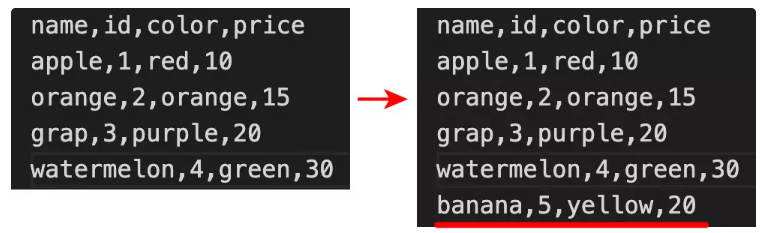

In [ ]:
import os
import csv
os.chdir('/content/drive/MyDrive/Colab Notebooks')   # 針對 Colab 改變路徑，本機環境可不用
csvfile = open('csv-demo.csv', 'a+')    # 使用 a+ 模式開啟檔案
r = csv.writer(csvfile)                 # 設定 r 為寫入
r.writerow('')                          # 如果原本的 CSV 最後一行 row 不為空，加入換行
                                        # 如果最後一行為空則不用
r.writerow(['banana',5,'yellow',20])    # 寫入單行資料

下方的例子使用 writerows 寫入多行資料。

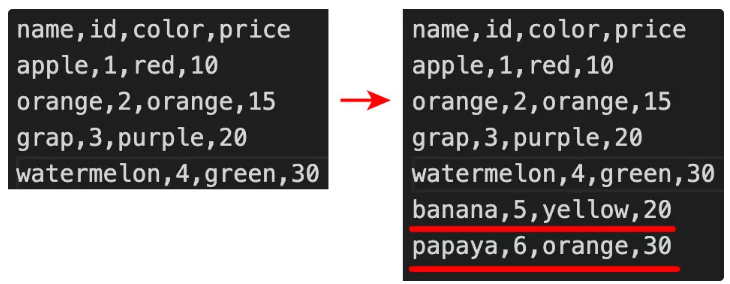

In [ ]:
import os
import csv
os.chdir('/content/drive/MyDrive/Colab Notebooks')   # 針對 Colab 改變路徑，本機環境可不用
csvfile = open('csv-demo.csv', 'a+')
write = csv.writer(csvfile)
data = [                        # 建立要寫入的資料串列
    ['banana',5,'yellow',20],
    ['papaya',6,'orange',30]
]
write.writerows(data)           # 寫入多行資料

##### DictReader(csvfile) 
csv.DictReader(csvfile) 可以用「字典」的型態，讀取 CSV 檔案，讀取後可以使用字典的操作方式，將每一行 ( row ) 印出，\
除了 csvfile 為必須填入的參數，還有下列幾個非預設的參數 ( 不填入則使用預設值 )。

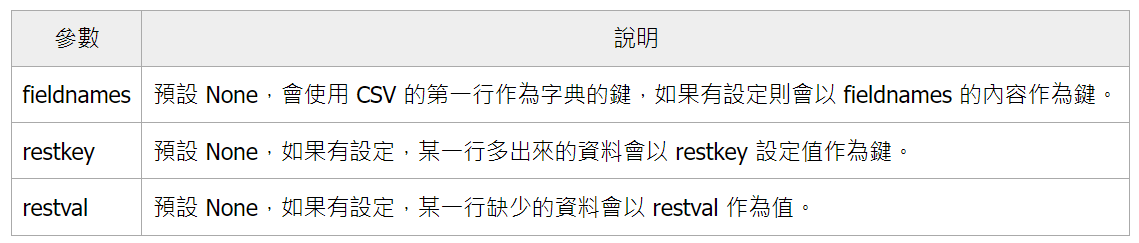

下方的程式碼執行後，會讀取 CSV 並單獨印出 name、id、color 和 price。

In [ ]:
import os
import csv
os.chdir('/content/drive/MyDrive/Colab Notebooks')  # 針對 Colab 改變路徑，本機環境可不用
csvfile = open('csv-demo.csv', 'r')   # 開啟 CSV 檔案模式為 r
data = csv.DictReader(csvfile)        # 以字典方式讀取資料
for i in data:
    print(i['name'],i['id'],i['color'],i['price'])   # 分別印出不同鍵的值

# apple 1 red 10
# orange 2 orange 15
# grap 3 purple 20
# watermelon 4 green 30
# banana 5 yellow 20

如果 CSV 的第一行不是標題 ( 直接就是資料 )，可透過下方的程式碼，使用 fieldnames 加入鍵 ( 為了明顯區隔，範例裡使用 a、b、c、d )，\
輸出結果可以看到，字典裡所有資料的鍵，都變成 a、b、c、d。

In [ ]:
import os
import csv
os.chdir('/content/drive/MyDrive/Colab Notebooks')
csvfile = open('csv-demo.csv', 'r')
keys = ['a','b','c','d']       # 手動設定字典的鍵
data = csv.DictReader(csvfile, fieldnames=keys)   # 設定 fieldnames 為 keys
for i in data:
    print(i)

# OrderedDict([('a', 'name'), ('b', 'id'), ('c', 'color'), ('d', 'price')])
# OrderedDict([('a', 'apple'), ('b', '1'), ('c', 'red'), ('d', '10')])
# OrderedDict([('a', 'orange'), ('b', '2'), ('c', 'orange'), ('d', '15')])
# OrderedDict([('a', 'grap'), ('b', '3'), ('c', 'purple'), ('d', '20')])
# OrderedDict([('a', 'watermelon'), ('b', '4'), ('c', 'green'), ('d', '30')])
# OrderedDict([('a', 'banana'), ('b', '5'), ('c', 'yellow'), ('d', '20')])

如果 CSV 的資料有多出來，或有缺漏，可以透過下方的程式碼，使用 restkey 或 restval 來補齊 ( 圖片是有多出來以及有缺漏的 CSV 檔案 )，\
執行後可以看到第四筆資料多了一個 more 的鍵，最後一筆資料缺漏的值都變成 0。

In [ ]:
import os
import csv
os.chdir('/content/drive/MyDrive/Colab Notebooks')
csvfile = open('csv-demo.csv', 'r')
data = csv.DictReader(csvfile, restkey='more', restval='0')
for i in data:
    print(i)

# OrderedDict([('name', 'apple'), ('id', '1'), ('color', 'red'), ('price', '10')])
# OrderedDict([('name', 'orange'), ('id', '2'), ('color', 'orange'), ('price', '15')])
# OrderedDict([('name', 'grap'), ('id', '3'), ('color', 'purple'), ('price', '20')])
# OrderedDict([('name', 'watermelon'), ('id', '4'), ('color', 'green'), ('price', '30'), ('more', ['1234567'])])
# OrderedDict([('name', 'test'), ('id', '0'), ('color', '0'), ('price', '0')])

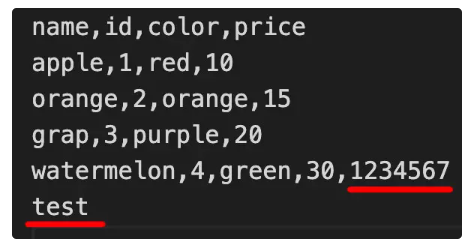

##### DictWriter(csvfile, fieldnames) 
DictWriter(csvfile, fieldnames) 可以用「字典」的型態，將資料寫入 CSV 檔案，寫入的方法分成 writerow 單行寫入以及 writerows 多行寫入兩種，\
下方的例子使用 writerow 寫入單筆資料。

* 注意，open 模式使用 a+ 表示可以讀取檔案以及寫入資料在原本資料的最後方，因此如果 CSV 最後一行不為空，\
資料會加在最後一筆資料後方 ( 在同一行 )，為了避免這個問題，可以將 CSV 檔案增加最後一行，\
或使用 writerow('') 加入一個空行。

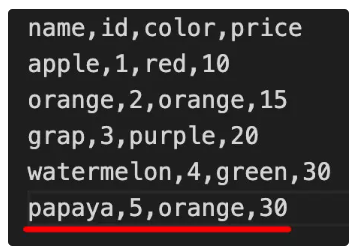

In [ ]:
import os
import csv
os.chdir('/content/drive/MyDrive/Colab Notebooks')
fieldnames = ['name','id','color','price']    # 定義要寫入資料的鍵
data = csv.DictWriter(csvfile, fieldnames=fieldnames)  # 設定 data 為寫入資料
data.writerow({'name':'papaya','id':5,'color':'orange','price':30})  # 寫入資料

下方例子使用 writerows 寫入多筆資料，多筆資料使用「串列 + 字典」的形式表現

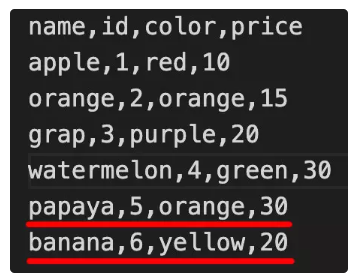

In [ ]:
import os
import csv
os.chdir('/content/drive/MyDrive/Colab Notebooks')
fieldnames = ['name','id','color','price']    # 定義要寫入資料的鍵
data = csv.DictWriter(csvfile, fieldnames=fieldnames)  # 設定 data 為寫入資料
w = [
    {'name':'papaya','id':5,'color':'orange','price':30},
    {'name':'banana','id':6,'color':'yellow','price':20}
]
data.writerows(w)